### What is Bank Churn?
Bank churn refers to the phenomenon where customers stop doing business with a bank or financial institution. This can happen for various reasons, including dissatisfaction with services, better offers from competitors, or changes in financial circumstances. Understanding and analyzing churn is crucial for banks, as retaining customers is often more cost-effective than acquiring new ones.

### Why Do We Want to Do Classification for It?
1.Proactive Customer Retention: By identifying customers who are likely to churn, banks can take proactive measures to retain them, such as targeted marketing campaigns, personalized offers, or improved services.

2.Cost Efficiency: Retaining existing customers is often less expensive than acquiring new ones. Understanding churn can help optimize marketing budgets.

3.Improving Customer Experience: Analyzing churn can highlight areas where the bank may be failing to meet customer needs, leading to improvements in services and customer satisfaction.

4.Strategic Decision Making: Insights from churn analysis can inform broader business strategies and product offerings, aligning them more closely with customer preferences.

5.Competitive Advantage: Banks that effectively manage churn can gain a competitive advantage by maintaining a loyal customer base and improving profitability.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./Data/Bank_Churn.csv')

In [4]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
data['CreditScore'] = data['CreditScore'].astype('int16')
data['Gender'] = data['Gender'].astype('category')
data['Age'] = data['Age'].astype('int16')
data['Tenure'] = data['Tenure'].astype('int16')
data['NumOfProducts'] = data['NumOfProducts'].astype('int16')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10000 non-null  int64   
 1   Surname          10000 non-null  object  
 2   CreditScore      10000 non-null  int16   
 3   Geography        10000 non-null  object  
 4   Gender           10000 non-null  category
 5   Age              10000 non-null  int16   
 6   Tenure           10000 non-null  int16   
 7   Balance          10000 non-null  float64 
 8   NumOfProducts    10000 non-null  int16   
 9   HasCrCard        10000 non-null  int64   
 10  IsActiveMember   10000 non-null  int64   
 11  EstimatedSalary  10000 non-null  float64 
 12  Exited           10000 non-null  int64   
dtypes: category(1), float64(2), int16(4), int64(4), object(2)
memory usage: 713.1+ KB


In [92]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'balance_to_income', 'income_v_products'],
      dtype='object')

In [8]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


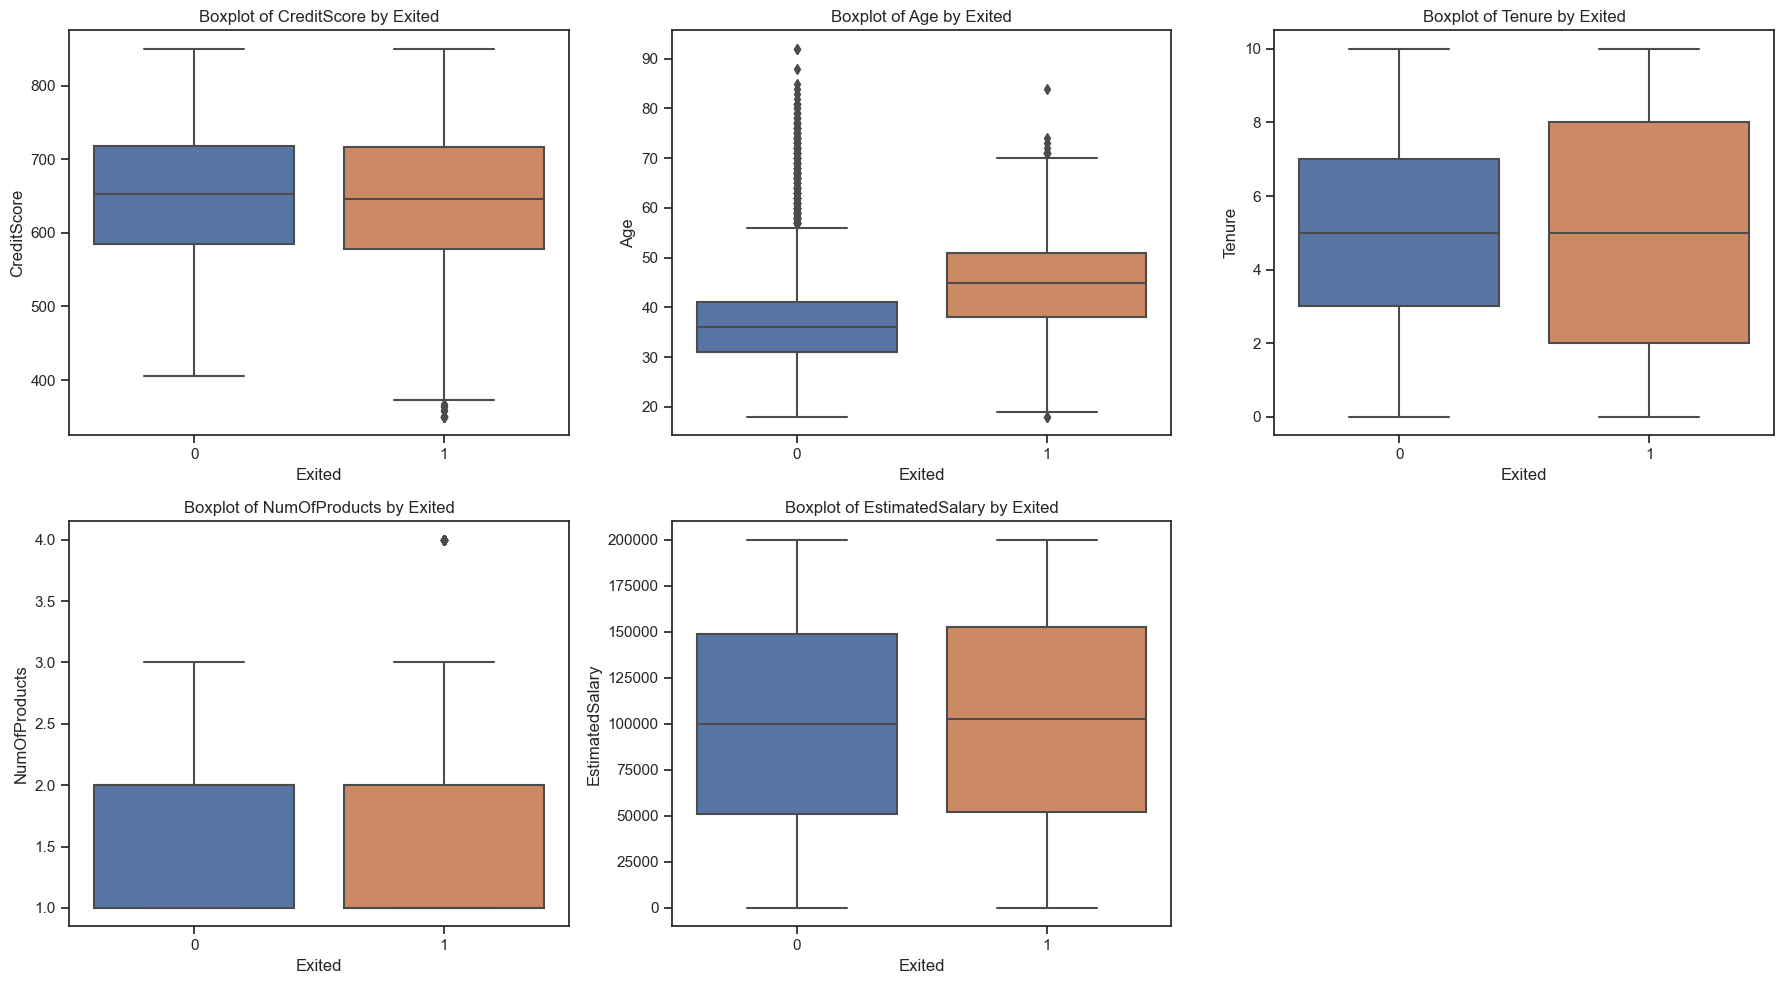

In [10]:
columns = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, column in enumerate(columns):
    sns.boxplot(data=data, x='Exited', y=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column} by Exited')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

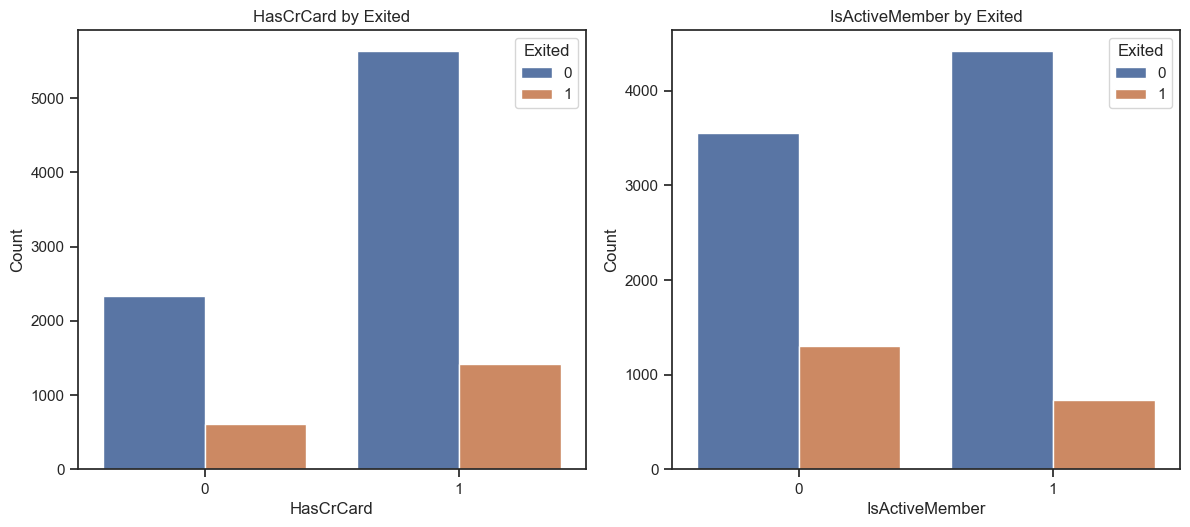

In [37]:
columns = ['HasCrCard', 'IsActiveMember']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, column in enumerate(columns):
    count_data = (
        data.groupby([column, 'Exited']).size()
        .reset_index(name='Count')
    )

    sns.barplot(data=count_data, x=column, y='Count', hue='Exited', ax=axes[i])

    axes[i].set_title(f'{column} by Exited')
    axes[i].set_ylabel('Count')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

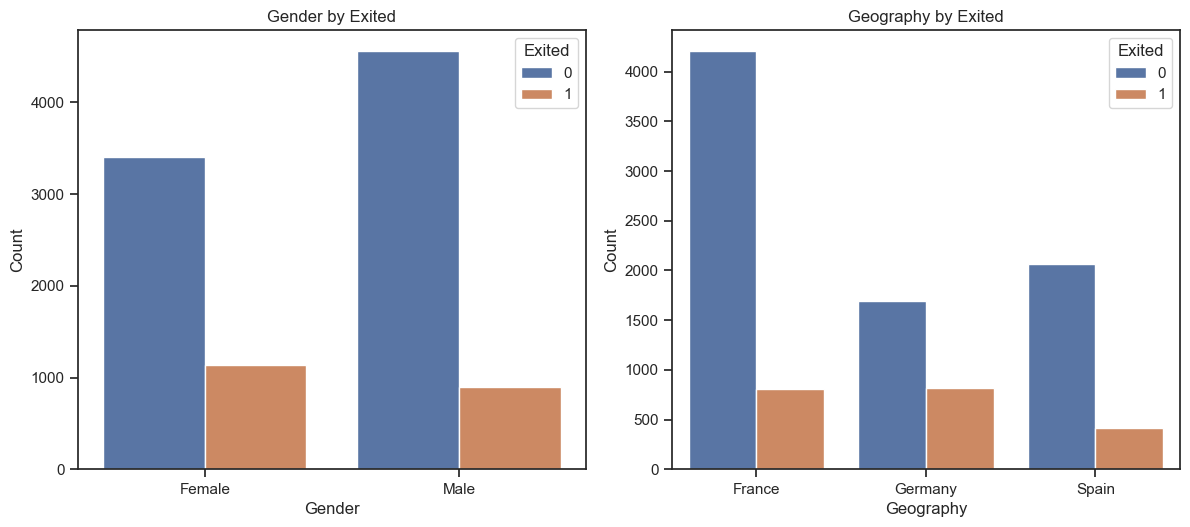

In [39]:
columns = ['Gender', 'Geography']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, column in enumerate(columns):
    count_data = (
        data.groupby([column, 'Exited']).size()
        .reset_index(name='Count')
    )

    sns.barplot(data=count_data, x=column, y='Count', hue='Exited', ax=axes[i])

    axes[i].set_title(f'{column} by Exited')
    axes[i].set_ylabel('Count')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Overall dont have any correlation, but some have weak negative correlation which we can see on Balance and NumOfProducts. probably doesn't mean anything

C:\Users\bangg\AppData\Local\Temp\ipykernel_18572\3729440097.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr(method = 'pearson')


<Axes: >

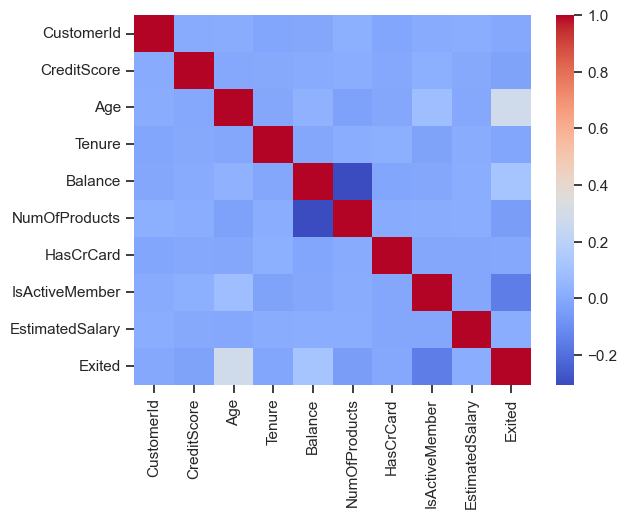

In [42]:
corr = data.corr(method = 'pearson')
sns.heatmap(corr, cmap = 'coolwarm')

In [47]:
data = data.drop(['CustomerId', 'Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**balance_to_income** : This column represents the ratio of a customer's balance to their estimated salary. It can help identify customers who maintain a high balance relative to their income, which may indicate financial health or spending habits.

**income_v_products**: This column represents the ratio of a customer’s estimated salary to the number of products they have with the bank. It could reveal whether customers with more bank products earn more or less relative to their income, potentially highlighting customer engagement or financial behavior.

In [49]:
data['balance_to_income'] = data['Balance']/ data['EstimatedSalary']
data['income_v_products'] = data['EstimatedSalary']/ data['NumOfProducts']

C:\Users\bangg\AppData\Local\Temp\ipykernel_18572\3729440097.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr(method = 'pearson')


<Axes: >

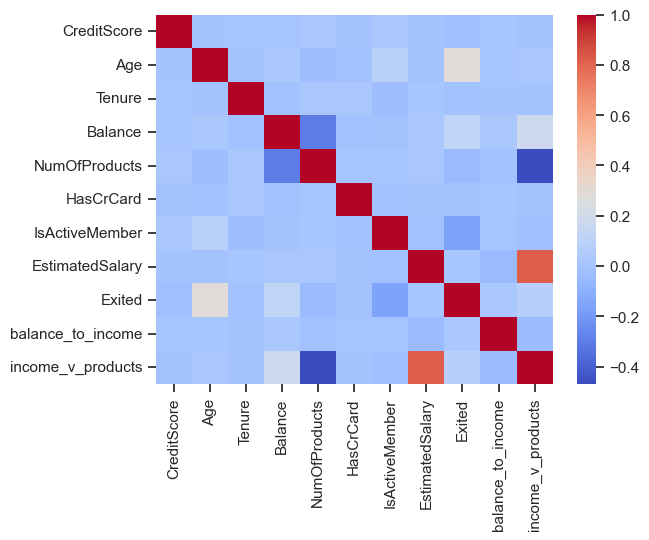

In [93]:
corr = data.corr(method = 'pearson')
sns.heatmap(corr, cmap = 'coolwarm')

In [53]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_to_income,income_v_products
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,101348.880
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,112542.580
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,37977.190
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,46913.315
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,79084.100


## Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [59]:
data_modelling = pd.get_dummies(data,drop_first = True, dtype = 'int')

In [60]:
data_modelling

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_to_income,income_v_products,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,101348.880,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.744677,112542.580,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.401375,37977.190,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.000000,46913.315,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,79084.100,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0.000000,48135.320,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0.564108,101699.770,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0.000000,42085.580,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0.808230,46444.260,1,0,1


In [62]:
X = data_modelling.drop('Exited', axis=1)
y = data_modelling['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [74]:
model = LogisticRegression(solver = 'newton-cholesky')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8125


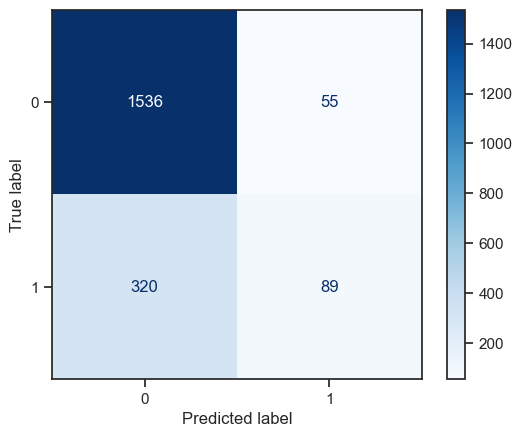

In [75]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [70]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", report)

Accuracy: 0.7915

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      1591
           1       0.43      0.06      0.11       409

    accuracy                           0.79      2000
   macro avg       0.62      0.52      0.50      2000
weighted avg       0.73      0.79      0.72      2000



AUC Score: 0.6516099883359792


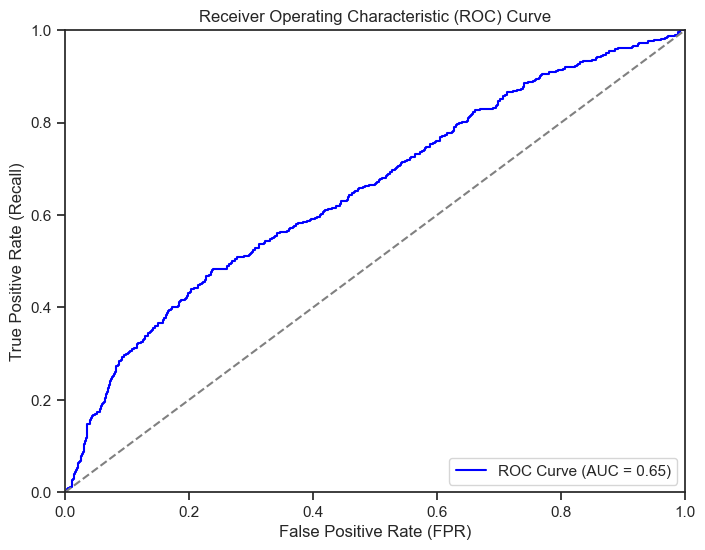

In [71]:
y_pred_prob = model.predict_proba(X_test)[:, 1] 

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc_score}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


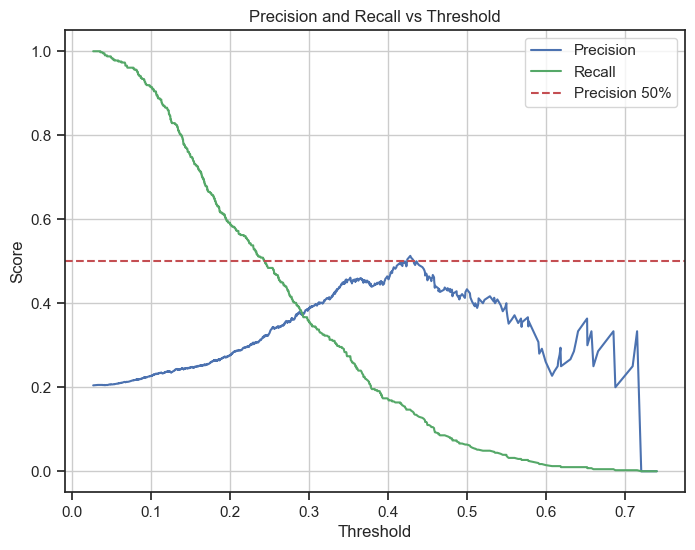

Best Threshold: 0.42
Precision at Best Threshold: 0.50
Recall at Best Threshold: 0.15


In [73]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='b')
plt.plot(thresholds, recall[:-1], label='Recall', color='g')
plt.axhline(y=0.5, color='r', linestyle='--', label='Precision 50%')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend(loc='best')
plt.grid()
plt.show()

indices = np.where(precision > 0.50)[0]

best_index = indices[np.argmax(recall[indices])]

best_threshold = thresholds[best_index]

print(f'Best Threshold: {best_threshold:.2f}')
print(f'Precision at Best Threshold: {precision[best_index]:.2f}')
print(f'Recall at Best Threshold: {recall[best_index]:.2f}')

In [77]:

rf_model = RandomForestClassifier(random_state=2024)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=2024)

In [78]:
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

In [79]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.86
Confusion Matrix:
 [[1536   55]
 [ 229  180]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1591
           1       0.77      0.44      0.56       409

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



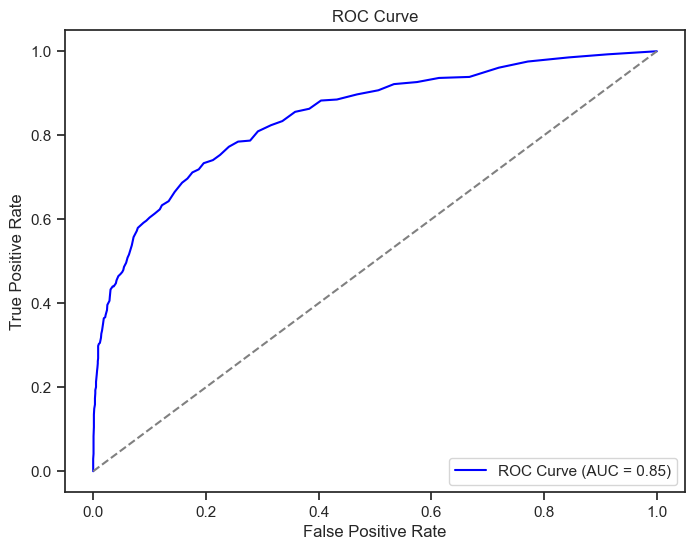

In [83]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [84]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],      # Number of features to consider when looking for the best split
    'max_depth': [None, 10, 20, 30],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
}

rf_model_cv = RandomForestClassifier(random_state=2024)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\bangg\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [85]:
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Best Model: {accuracy:.2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy of Best Model: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1591
           1       0.78      0.43      0.55       409

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



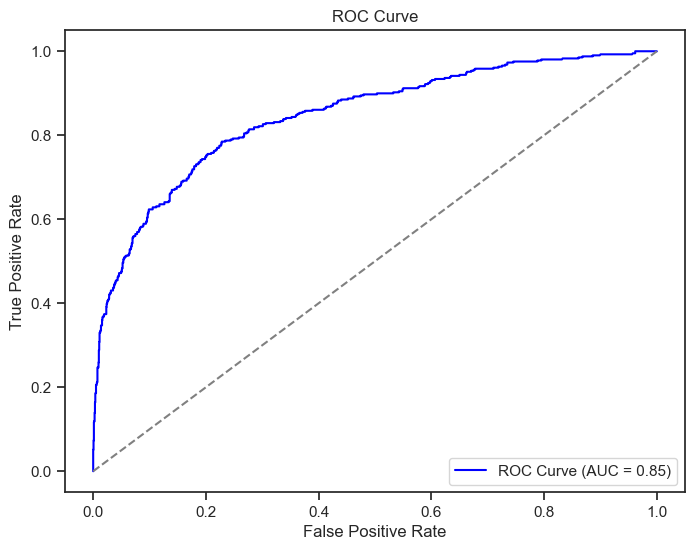

In [86]:
y_pred_prob = best_model.predict_proba(X_test)[:, 1] 

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

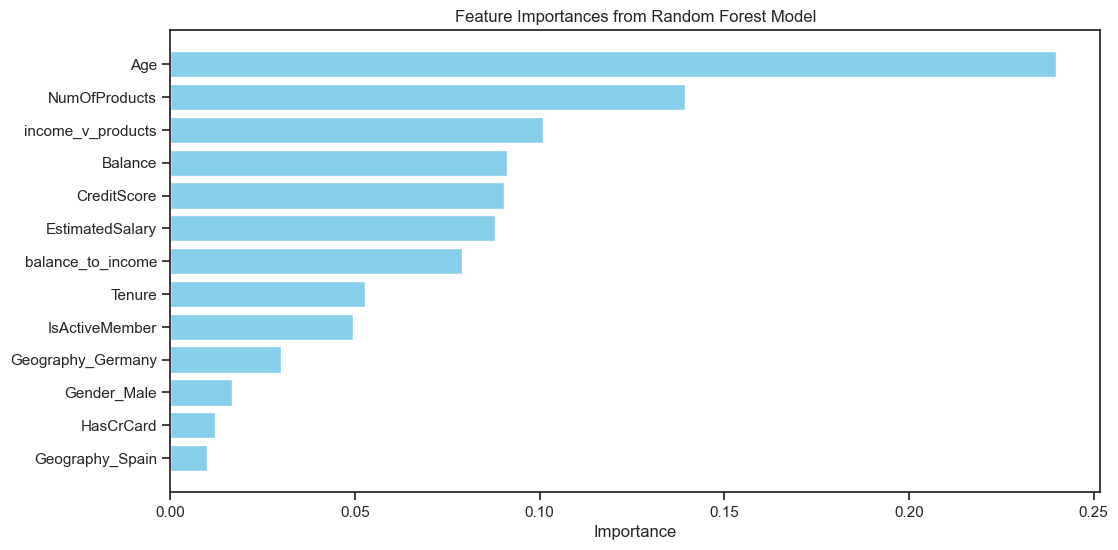

In [87]:
importances = best_model.feature_importances_

# Step 3: Create a DataFrame for Feature Importances
feature_names = X.columns  # Get the feature names
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Step 4: Sort the DataFrame by Importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Step 5: Visualize Feature Importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [99]:
feature_importances_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
1,Age,0.239808
4,NumOfProducts,0.139268
9,income_v_products,0.101062
3,Balance,0.091318
0,CreditScore,0.090481
7,EstimatedSalary,0.087978
8,balance_to_income,0.078906
2,Tenure,0.052686
6,IsActiveMember,0.049601
10,Geography_Germany,0.029974


In [102]:
# Create a DataFrame with the original test data and predictions
predictions_df = X_test.copy()  # Copy features
predictions_df['Exited'] = y_pred  # Add predictions

# If you want to include probabilities
predictions_df['Churn_Probability'] = y_pred_prob

# Display the predictions
predictions_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,balance_to_income,income_v_products,Geography_Germany,Geography_Spain,Gender_Male,Exited,Churn_Probability
8374,628,55,7,0.00,3,1,0,85890.75,0.000000,28630.250,0,1,0,1,0.896333
6935,670,33,1,0.00,2,1,1,86413.11,0.000000,43206.555,0,0,1,0,0.005000
5103,783,58,3,127539.30,1,1,1,96590.39,1.320414,96590.390,1,0,0,0,0.444429
8963,741,52,1,171236.30,2,0,0,21834.40,7.842501,10917.200,0,0,1,1,0.530857
4993,554,44,6,92436.86,1,1,0,126033.90,0.733429,126033.900,0,0,0,0,0.403119


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, roc_curve, roc_auc_score, 
                             classification_report, confusion_matrix, 
                             ConfusionMatrixDisplay, precision_recall_curve)
from sklearn.ensemble import RandomForestClassifier

In [104]:
# Preprocess the data
data_modelling = pd.get_dummies(data, drop_first=True, dtype='int')
X = data_modelling.drop('Exited', axis=1)
y = data_modelling['Exited']

In [105]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

### Logistic Regression

In [107]:
# Logistic Regression Model
model = LogisticRegression(solver='newton-cholesky')
model.fit(X_train, y_train)

# Predictions and Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Model Accuracy:", accuracy)

Logistic Regression Model Accuracy: 0.8125


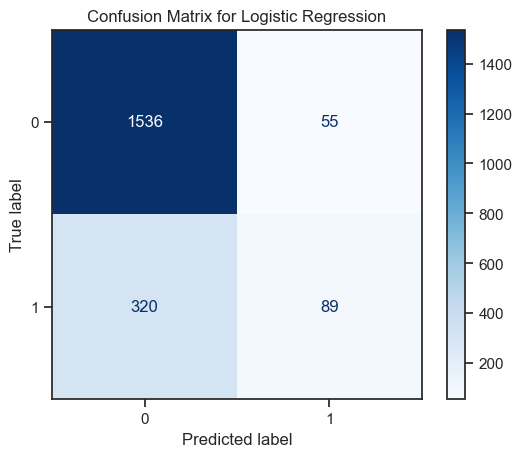

In [108]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [109]:
# Classification Report
report = classification_report(y_test, y_pred)
print("\nLogistic Regression Classification Report:\n", report)


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1591
           1       0.62      0.22      0.32       409

    accuracy                           0.81      2000
   macro avg       0.72      0.59      0.61      2000
weighted avg       0.78      0.81      0.77      2000



Logistic Regression AUC Score: 0.77


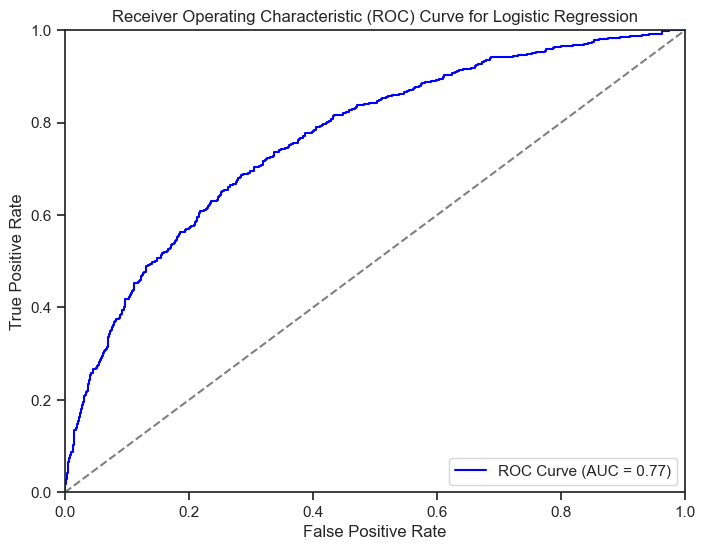

In [110]:
# ROC Curve and AUC Score
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"Logistic Regression AUC Score: {auc_score:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

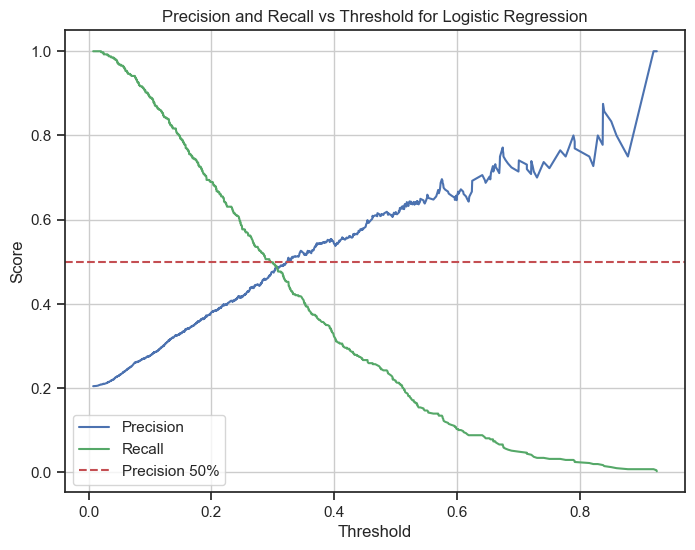

In [111]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='b')
plt.plot(thresholds, recall[:-1], label='Recall', color='g')
plt.axhline(y=0.5, color='r', linestyle='--', label='Precision 50%')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold for Logistic Regression')
plt.legend(loc='best')
plt.grid()
plt.show()

In [112]:
# Best Threshold Determination
indices = np.where(precision > 0.50)[0]
best_index = indices[np.argmax(recall[indices])]
best_threshold = thresholds[best_index]
print(f'Best Threshold: {best_threshold:.2f}')
print(f'Precision at Best Threshold: {precision[best_index]:.2f}')
print(f'Recall at Best Threshold: {recall[best_index]:.2f}')

Best Threshold: 0.32
Precision at Best Threshold: 0.50
Recall at Best Threshold: 0.45


### Random Forest Classifier

In [113]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=2024)
rf_model.fit(X_train, y_train)

# Predictions and Accuracy for Random Forest
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

Random Forest Accuracy: 0.86


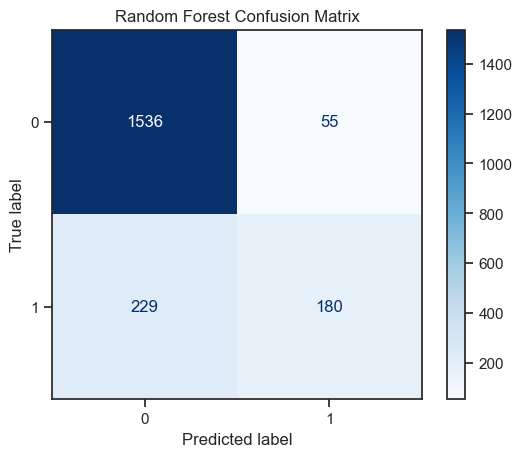

In [117]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()

In [118]:
# Classification Report for Random Forest
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1591
           1       0.77      0.44      0.56       409

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



Random Forest AUC Score: 0.85


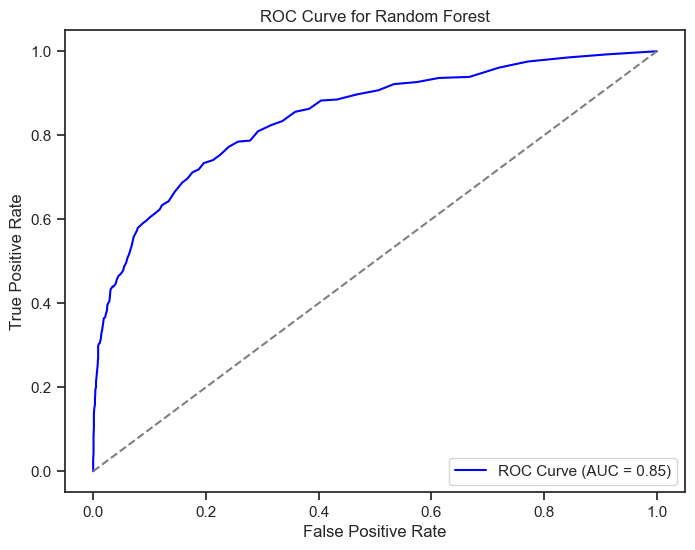

In [119]:
# ROC Curve and AUC Score for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
auc_score_rf = roc_auc_score(y_test, y_pred_prob_rf)
print(f"Random Forest AUC Score: {auc_score_rf:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC Curve (AUC = {auc_score_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

In [120]:
# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf_model_cv = RandomForestClassifier(random_state=2024)
grid_search = GridSearchCV(estimator=rf_model_cv, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\bangg\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [121]:
# Predictions and Accuracy of Best Model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Accuracy of Best Random Forest Model: {accuracy_best:.2f}')
print("\nBest Random Forest Classification Report:\n", classification_report(y_test, y_pred_best))

Accuracy of Best Random Forest Model: 0.86

Best Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1591
           1       0.78      0.43      0.55       409

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



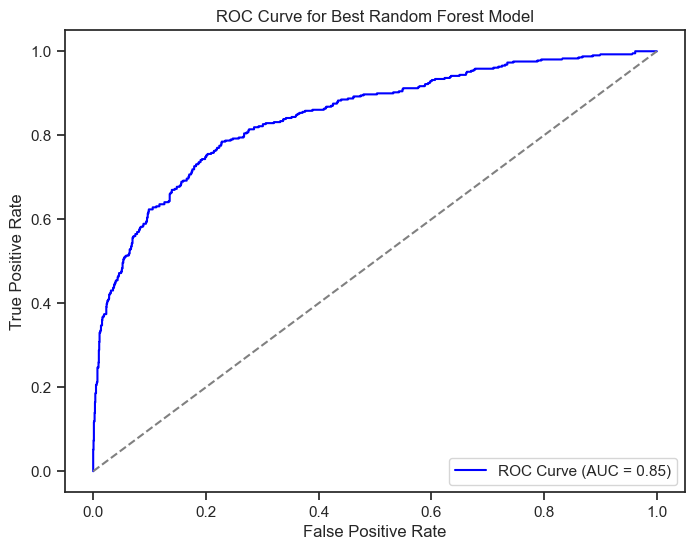

In [122]:
# ROC Curve and AUC Score for Best Model
y_pred_prob_best = best_model.predict_proba(X_test)[:, 1] 
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_prob_best)
auc_score_best = roc_auc_score(y_test, y_pred_prob_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, color='blue', label=f'ROC Curve (AUC = {auc_score_best:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Random Forest Model')
plt.legend(loc='lower right')
plt.show()

### Feature Importances

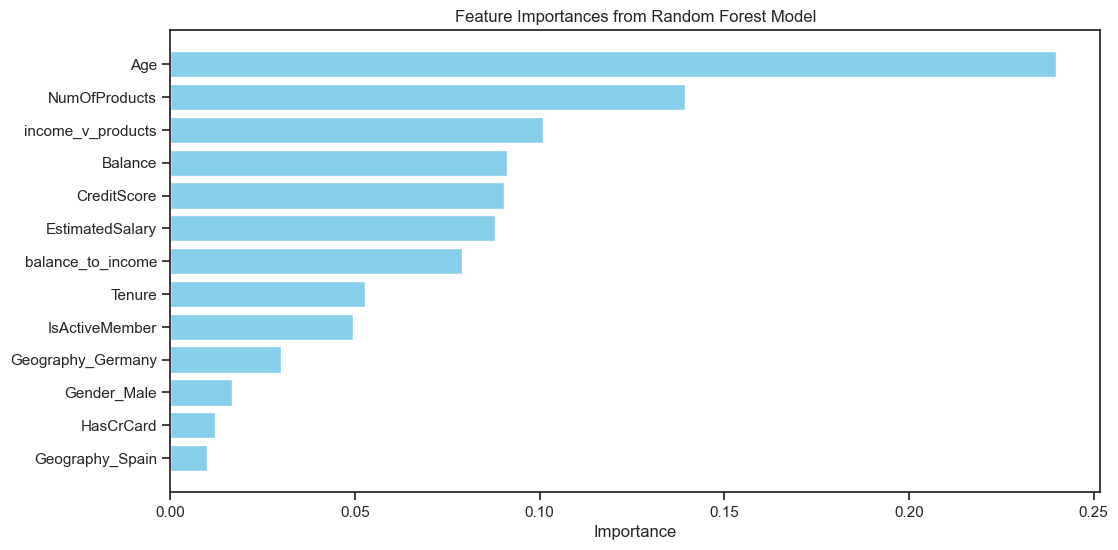

In [123]:
# Feature Importances
importances = best_model.feature_importances_

# Create a DataFrame for Feature Importances
feature_names = X.columns  # Get the feature names
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by Importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Visualize Feature Importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()
